In [39]:
import pandas as pd
from Bio import SeqIO

### ab info table

In [40]:
ab_info_df = pd.read_csv('abs_info_junction_aa_IMGT.txt', delimiter=',')
print(ab_info_df.columns)
ab_info_df.head(10)

Index(['Antibody', 'Antibody binding type', 'PDB or other structure',
       'Ab patient', 'Clonal lineage', 'Isolation paper(Pubmed ID)',
       'Neutralizing antibody feature', 'Germline paper(Pubmed ID)',
       'Germline software & DB', 'Heavy V (IGHV)', 'Heavy D (IGHD)',
       'Heavy J (IGHJ)', 'Heavy CDR3 length', 'Heavy CDR3 seq',
       'HC SHM NA (%)', 'HC SHM AA (%)', ' Light V (IGKV or IGLV)',
       'Light J (IGKJ or IGLJ)', 'Light CDR3 length', 'Light CDR3 seq',
       'LC SHM NA (%)', 'LC SHM AA (%)', ' Light chain type', 'ADCC', 'Type',
       'Species', 'Aliases', 'LANL comments', 'Mean panel IC50',
       'SD panel IC50', '# assays', 'CATNAP ID', 'Immuno ID', 'heavy_chain_aa',
       'light_chain_aa', 'light_chain_na', 'heavy_chain_na',
       'junction_aa_IMGT', 'v_identity'],
      dtype='object')


,Antibody,Antibody binding type,PDB or other structure,Ab patient,Clonal lineage,Isolation paper(Pubmed ID),Neutralizing antibody feature,Germline paper(Pubmed ID),Germline software & DB,Heavy V (IGHV),...,SD panel IC50,# assays,CATNAP ID,Immuno ID,heavy_chain_aa,light_chain_aa,light_chain_na,heavy_chain_na,junction_aa_IMGT,v_identity
0,0.5gamma,gp120 V3 // V3 glycan (V3g),NaN,KTS376,NaN,Yoshimura2010(20504942),0.5γ epitope;Mutations coupling nAb resistance...,RamirezValdez2015(25486586),IMGT/V-QUEST,3-30*09 or 3-30*01,...,9.32793,48.0,498.0,2475.0,QVQLVESGGGVVQPGRSLRVSCVASGFMFSNYAMHWVRQTAGKGLE...,DIVMTQSPLSLAVTPGEPASISCRSSQSLLHSDGNNYLDWYLQKPG...,NaN,NaN,NaN,NaN
1,0PV-a.01,fusion peptide // near gp41-gp120 interface,6MQR(0PV-a.01 in complex with fusion peptide);...,0PV,NaN,Kong2019(31348886),0PV-a.01 neutralization-associated sites;0PV-c...,Kong2019(31348886),IgBlast IMGT/V-QUEST,NaN,...,3.83337,417.0,820.0,4510.0,EVQLVESGPGVMKPSETLSLICAVSGDTISSPYYFWSWVRQPRGKG...,DIQMTQSPSSLSASVGDRVTITCRASQDIKNSLSWYQQKLGKAPRR...,GACATTCAGATGACGCAGTCTCCATCCTCCCTCTCTGCATCTGTAG...,GAGGTGCAGCTGGTGGAGTCGGGCCCAGGAGTGATGAAGCCTTCGG...,CARERVVAHNYYGLDLW,84.106
2,0PV-b.01,fusion peptide // near gp41-gp120 interface,6N16(0PV-b.01 in complex with HIV fusion peptide),0PV,NaN,Kong2019(31348886),0PV-b.01 neutralization-associated sites,Kong2019(31348886),IgBlast IMGT/V-QUEST,NaN,...,2.55310,417.0,821.0,4511.0,QVQLQESGPGVVKPSETLSLTCGVSGGTISSSHFYWSWIRQPPGKG...,DIVMTQTPLSLSVTPGEPASISCRSSQSLLHSNGHTYVHWYLQKAG...,GATATTGTGATGACCCAGACTCCACTCTCCCTCTCCGTCACCCCTG...,CAGGTGCAGCTGCAGGAGTCGGGCCCAGGAGTGGTGAAGCCTTCGG...,CVREPVIAAAGTVDVW,87.086
3,0PV-c.01,fusion peptide // near gp41-gp120 interface,6MQC(0PV-c.01 in complex with fusion peptide);...,0PV,NaN,Kong2019(31348886),NaN,Kong2019(31348886),IgBlast IMGT/V-QUEST,NaN,...,2.84227,417.0,822.0,4512.0,QVQLVESGPGVVKPSETLSLTCVVSGGTPGRGFLYWSWVRQPPGKG...,DIVMTQTPLSLPVTPGEPASISCRSSQSLLDSDGNTCLDWFLQKPG...,GATATTGTGATGACCCAGACTCCGCTCTCCCTGCCCGTCACCCCTG...,CAGGTGCAGCTGGTGGAGTCGGGCCCAGGAGTGGTGAAGCCTTCGG...,CTSRAKDYRGPSYSRIDVW,80.602
4,10-1074,gp120 V3 // V3 glycan (V3g),4FQ2(10-1074 Fab);5T3X(Natively Glycosylated B...,Donor 17,PGT121,Mouquet2012a(23115339),10-1074 contacts;10-1074 contacts;10-1074 neut...,Klein2013(23540694),IgBlast,4-59,...,60.89020,4396.0,17.0,2777.0,QVQLQESGPGLVKPSETLSVTCSVSGDSMNNYYWTWIRQSPGKGLE...,SYVRPLSVALGETARISCGRQALGSRAVQWYQHRPGQAPILLIYNN...,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mouquet2012a(23115339),IgBlast IMGT/V-QUEST,4-59*01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10-1074GM,gp120 V3 // V3 glycan (V3g),NaN,Donor 17,PGT121,Mouquet2012a(23115339),NaN,NaN,NaN,NaN,...,13.05820,26.0,362.0,3897.0,NaN,NaN,NaN,NaN,NaN,NaN
7,10-1074-IgG3C-,gp120 V3 // V3 glycan (V3g),NaN,Donor 17,PGT121,Bournazos2016(27315478),NaN,NaN,NaN,NaN,...,48.27150,238.0,274.0,3539.0,NaN,NaN,NaN,NaN,NaN,NaN
8,10-1074V,gp120 V3 // V3 glycan (V3g),NaN,Donor 17,PGT121,NaN,hypervariable loop characteristic correlations...,NaN,NaN,NaN,...,76.40790,600.0,243.0,3283.0,NaN,NaN,NaN,NaN,NaN,NaN
9,10-1121,gp120 V3 // V3 glycan (V3g),NaN,Donor 17,PGT121,Mouquet2012a(23115339),NaN,Mouquet2012a(23115339),IgBlast IMGT/V-QUEST,4-59*01,...,NaN,20.0,369.0,2803.0,QVQLQESGPGLVKPPETLSLTCSVSGASINDAYWSWIRQSPGKRPE...,SFVSVAPGQTARITCGEESLGSRSVIWYQQRPGQAPSLIMYNNHDR...,NaN,NaN,NaN,NaN


In [41]:
#cdrh3 extracted from PyIR using IMGT method
ab_info_df['junction_aa_IMGT']

0                      NaN
1        CARERVVAHNYYGLDLW
2         CVREPVIAAAGTVDVW
3      CTSRAKDYRGPSYSRIDVW
4                      NaN
              ...         
806        CARMGAAREWDFQYW
807      CARRMRSQDREWDFQHW
808                    NaN
809                    NaN
810                    NaN
Name: junction_aa_IMGT, Length: 811, dtype: object

In [42]:
# cdrh3 from catnap
ab_info_df['Heavy CDR3 seq']

0        ARDLDQTIPDLTAPAFEV
1         CARERVVAHNYYGLDLW
2          CVREPVIAAAGTVDVW
3        TSRAKDYRGPSYSRIDVW
4                       NaN
               ...         
806             MGAAREWDFQY
807            RRSQDREWDFQH
808                     NaN
809    ARSLLRSLERLMGGTDAFDI
810                     NaN
Name: Heavy CDR3 seq, Length: 811, dtype: object

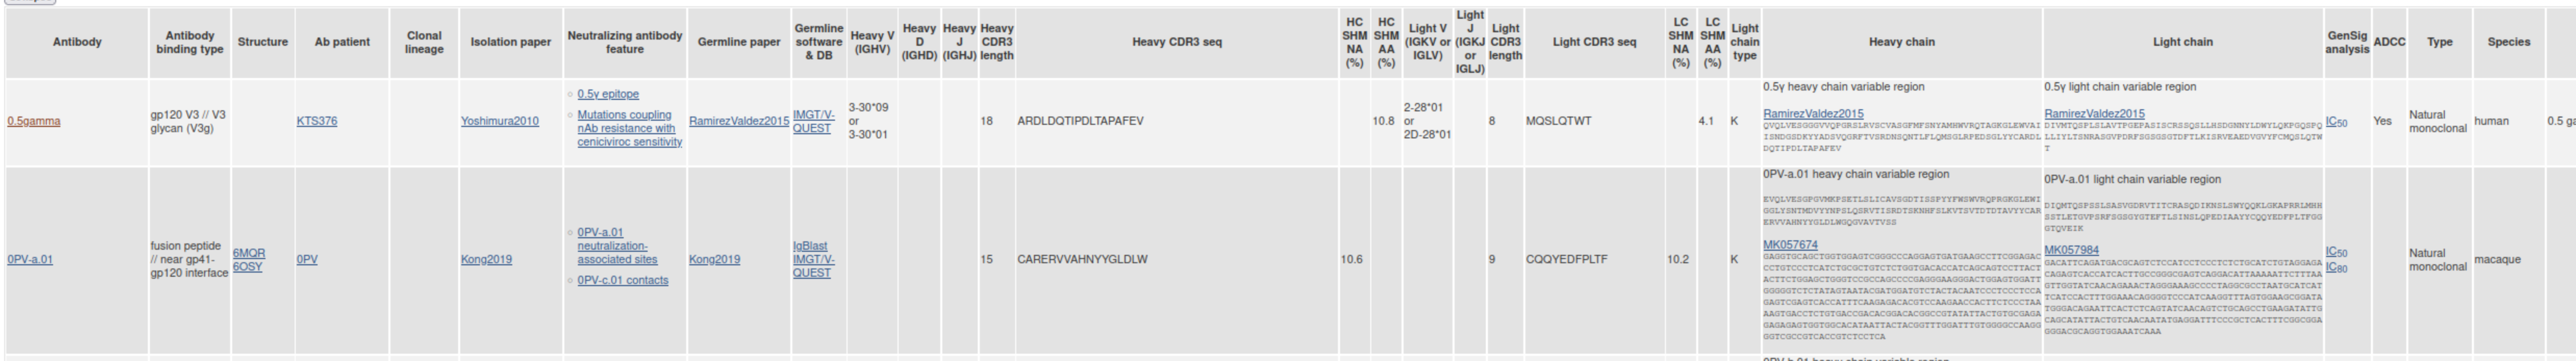

### neutral table

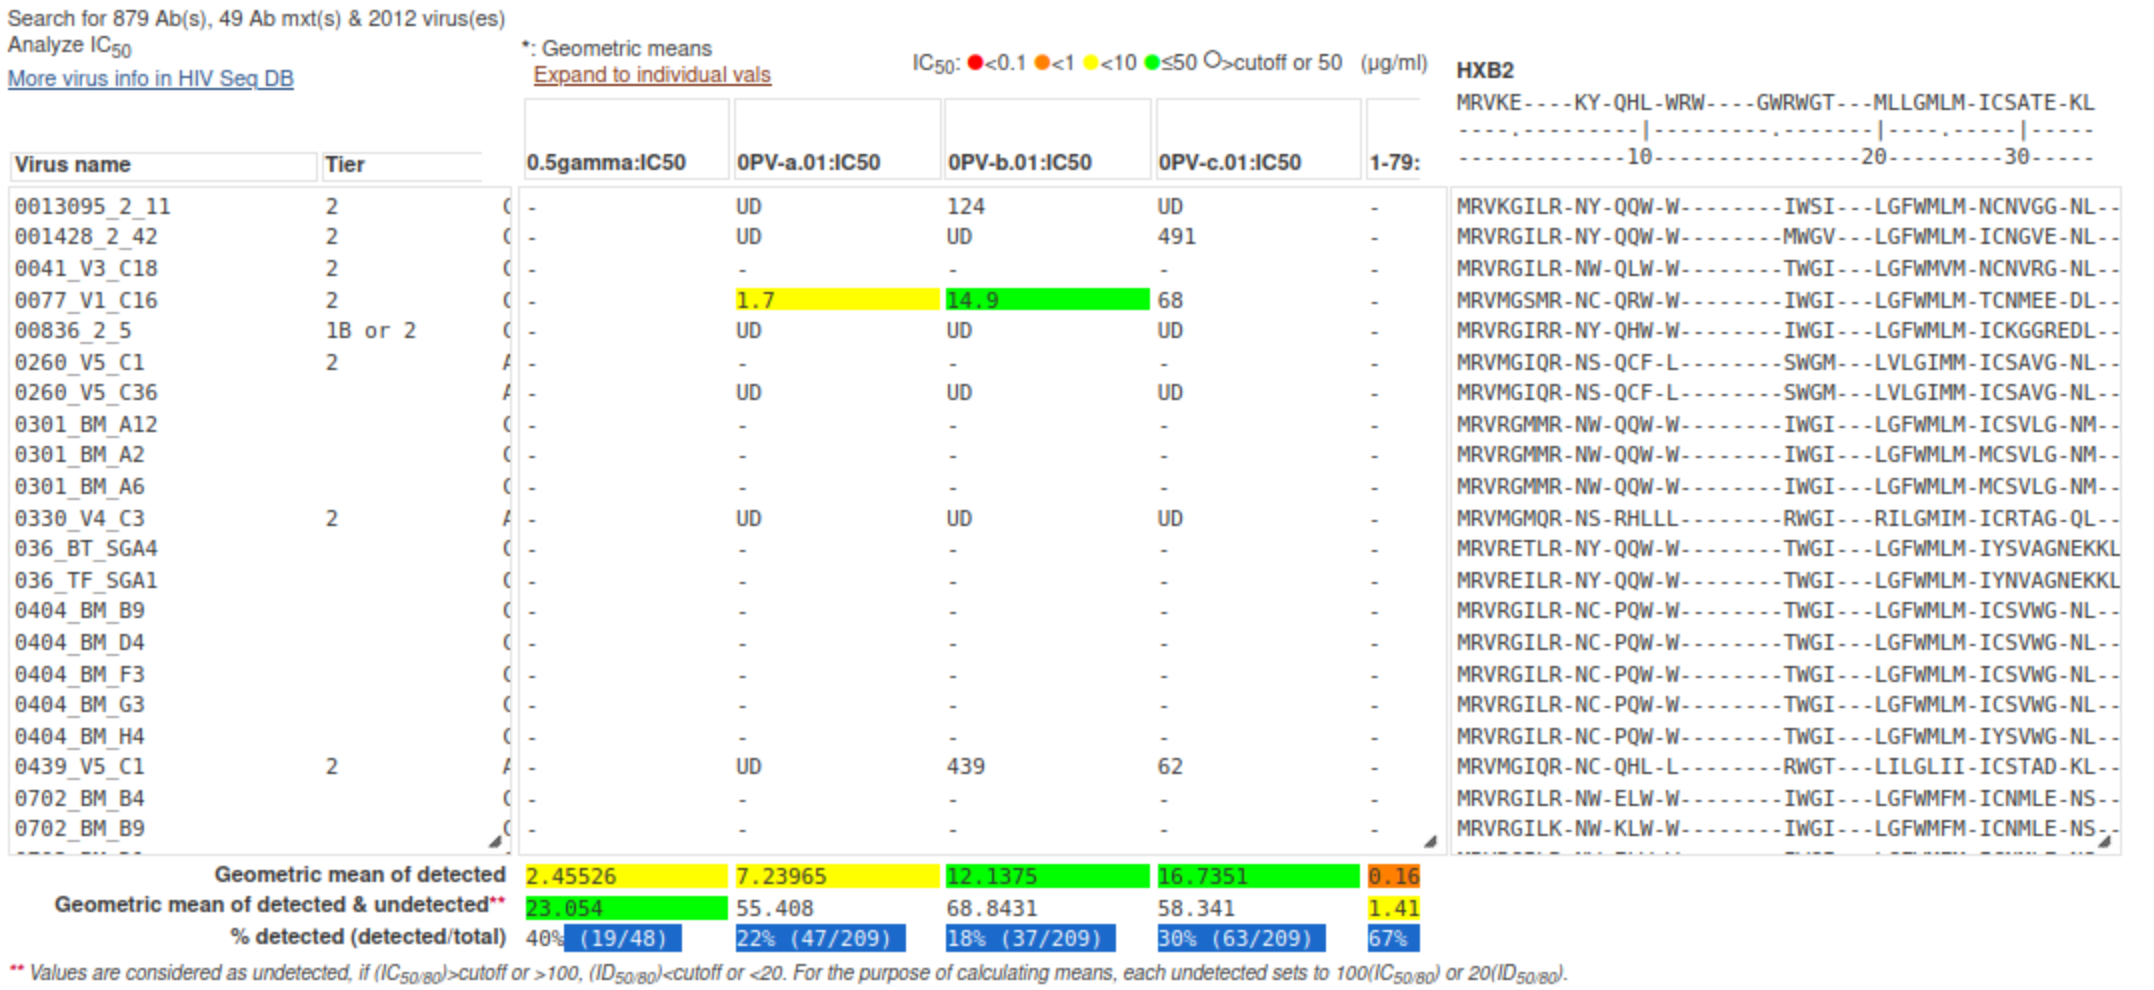

In [43]:
neutral_df = pd.read_csv('neutral.txt', delimiter='\t',error_bad_lines=False)
neutral_df.head(3)

/tmp/ipykernel_2669693/437789859.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  neutral_df = pd.read_csv('neutral.txt', delimiter='\t',error_bad_lines=False)
Skipping line 2005: expected 1617 fields, saw 1618
Skipping line 2006: expected 1617 fields, saw 1618
Skipping line 2007: expected 1617 fields, saw 1618

/tmp/ipykernel_2669693/437789859.py:1: DtypeWarning: Columns (14,22,32,34,36,38,40,42,44,46,48,66,68,70,72,74,76,78,80,82,84,112,122,124,126,140,144,150,154,156,160,162,164,166,168,170,192,198,202,204,212,262,294,298,302,310,322,324,326,328,344,348,360,426,430,450,454,456,458,460,462,476,486,488,490,542,554,556,558,560,564,566,606,608,634,638,640,646,656,664,666,674,676,682,684,692,694,700,816,818,820,822,826,830,832,836,838,840,842,844,846,850,852,856,858,860,866,868,872,876,878,882,884,886,890,914,946,964,970,972,974,980,1018,1022,1024,1026,1028,1030,1032,1034,1072,1076,1078,1080

,Virus name,Tier,Subtype,Infection stage,Coreceptor,Country,Year,Accession,Alias,Seq data,...,polyclonal Patient 3:IC50: geometric mean,polyclonal Patient 3:IC50: by study,polyclonal Patient 8:IC50: geometric mean,polyclonal Patient 8:IC50: by study,polyclonal R1:IC50: geometric mean,polyclonal R1:IC50: by study,polyclonal pt7 IgA:IC50: geometric mean,polyclonal pt7 IgA:IC50: by study,polyclonal pt7 IgG:IC50: geometric mean,polyclonal pt7 IgG:IC50: by study
0,0013095_2_11,2,C,<3mo,CCR5,INDIA,2000.0,EF117267,"0013095, HIV_0013095_2_11, 0013095-2.11, HIV-0...",Yes,...,105.50,105.50: Barnes2022_dataset2,-,NaN,-,NaN,-,NaN,-,NaN
1,001428_2_42,2,C,<3mo,CCR5,INDIA,2000.0,EF117266,"001428, HIV_001428_2_42, 001428-2.42, HIV-0014...",Yes,...,22.70,22.70: Barnes2022_dataset2,-,NaN,-,NaN,-,NaN,-,NaN
2,0041_V3_C18,2,C,<12mo,NaN,TANZANIA,2004.0,HM215253,0041.V3.C18,Yes,...,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN


### antibodies name

In [44]:
# extract from the neutral df table all the antibodies names
abs_info = neutral_df.loc[:, '0.5gamma:IC50: geometric mean':]
abs_info.head(1)
#keeping only 'geometric mean' info per antibody
columns_to_remove = [col for col in abs_info.columns if col.endswith("by study")]
abs_info = abs_info.loc[:, ~abs_info.columns.isin(columns_to_remove)]
print('# antibodies:', len(abs_info.columns))

# antibodies: 802


neutral.txt is in a very complicated format. I have extracted by hand and save in 3 different files the following info: 
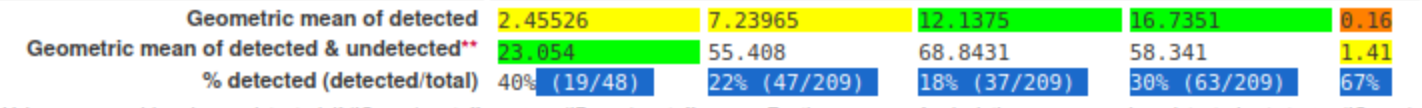

# abs % detection

In [45]:
# extract the antibododies detection percentage
perc_detected_per_antibody = pd.read_csv('% detected (detected:total).txt', sep='\t', header=None).T
#perc_detected_per_antibody.head(2) #one is with value because 'abs : geometric mean' and one is with Nan because 'abs: by study' 
# removing nan 'per study'
perc_detected_per_antibody = perc_detected_per_antibody.iloc[::2]
perc_detected_per_antibody[['%detected', 'ratio']] = perc_detected_per_antibody[0].str.split(expand=True)
#perc_detected_per_antibody.drop(columns=[0],inplace=True)

# Rimuovi il simbolo '%' dalla colonna delle percentuali
#perc_detected_per_antibody['Percentuale'] = df['Percentuale'].str.rstrip('%').astype(float)

# Rimuovi le parentesi tonde dai valori di ratio e suddividi in due colonne
#df[['Valore1', 'Valore2']] = df['Ratio'].str.extract(r'(\d+)\/(\d+)').astype(float)

perc_detected_per_antibody['Antibody'] = abs_info.columns
perc_detected_per_antibody = perc_detected_per_antibody[['Antibody','%detected','ratio']].reset_index(drop=True)
perc_detected_per_antibody['Antibody'] = perc_detected_per_antibody['Antibody'].str.replace(':IC50: geometric mean', '')
print('CHECK # %detected (should be the same as abs info: ', len(perc_detected_per_antibody))

perc_detected_per_antibody.head(20)

CHECK # %detected (should be the same as abs info:  802


,Antibody,%detected,ratio
0,0.5gamma,40%,(19/48)
1,0PV-a.01,22%,(47/209)
2,0PV-b.01,18%,(37/209)
3,0PV-c.01,30%,(63/209)
4,1-79,67%,(12/18)
5,10-1074,60%,(634/1053)
6,10-1074-IgG3C-,60%,(71/119)
7,10-1074GM,81%,(21/26)
8,10-1074V,67%,(134/201)
9,10-1121,90%,(9/10)


In [46]:
ab_info_df.columns

Index(['Antibody', 'Antibody binding type', 'PDB or other structure',
       'Ab patient', 'Clonal lineage', 'Isolation paper(Pubmed ID)',
       'Neutralizing antibody feature', 'Germline paper(Pubmed ID)',
       'Germline software & DB', 'Heavy V (IGHV)', 'Heavy D (IGHD)',
       'Heavy J (IGHJ)', 'Heavy CDR3 length', 'Heavy CDR3 seq',
       'HC SHM NA (%)', 'HC SHM AA (%)', ' Light V (IGKV or IGLV)',
       'Light J (IGKJ or IGLJ)', 'Light CDR3 length', 'Light CDR3 seq',
       'LC SHM NA (%)', 'LC SHM AA (%)', ' Light chain type', 'ADCC', 'Type',
       'Species', 'Aliases', 'LANL comments', 'Mean panel IC50',
       'SD panel IC50', '# assays', 'CATNAP ID', 'Immuno ID', 'heavy_chain_aa',
       'light_chain_aa', 'light_chain_na', 'heavy_chain_na',
       'junction_aa_IMGT', 'v_identity'],
      dtype='object')

# FINAL DATA TABLE: abs. %detected, ratio,junction_aa_IMGT

In [47]:
# selecting only needed abs info
abs = ab_info_df[['Antibody','junction_aa_IMGT','Species','v_identity']]
abs.head(2)

,Antibody,junction_aa_IMGT,Species,v_identity
0,0.5gamma,NaN,human,NaN
1,0PV-a.01,CARERVVAHNYYGLDLW,macaque,84.106


In [48]:
abs

,Antibody,junction_aa_IMGT,Species,v_identity
0,0.5gamma,NaN,human,NaN
1,0PV-a.01,CARERVVAHNYYGLDLW,macaque,84.106
2,0PV-b.01,CVREPVIAAAGTVDVW,macaque,87.086
3,0PV-c.01,CTSRAKDYRGPSYSRIDVW,macaque,80.602
4,10-1074,NaN,human,NaN
...,...,...,...,...
806,VRC-PG19,CARMGAAREWDFQYW,human,77.551
807,VRC-PG20,CARRMRSQDREWDFQHW,human,76.531
808,X5,NaN,human,NaN
809,Y498,NaN,human,NaN


In [49]:
# keeping only abs with complete info
complete_abs_info  = perc_detected_per_antibody.merge(abs, on='Antibody', how='inner')
print(f'# total abs:{len(complete_abs_info)}')
complete_abs_info = complete_abs_info.dropna()
print(f'# total abs after removing nan:{len(complete_abs_info)}')
#removing c and w if seq starts/ends with
complete_abs_info['junction_aa_IMGT_original'] = complete_abs_info['junction_aa_IMGT']
complete_abs_info['junction_aa_IMGT'] = complete_abs_info['junction_aa_IMGT'].str.lstrip('C').str.rstrip('W')

def set_label(value):
    if 1 <= value < 25:
        return 'NEU'
    elif value >= 25:
        return 'BRO'
    else:
        return 'NON'


complete_abs_info['%detected'] = complete_abs_info ['%detected'].str.rstrip('%').astype(float)
complete_abs_info['label'] = complete_abs_info['%detected'].apply(set_label)
complete_abs_info

# total abs:754
# total abs after removing nan:362


,Antibody,%detected,ratio,junction_aa_IMGT,Species,v_identity,junction_aa_IMGT_original,label
1,0PV-a.01,22.0,(47/209),ARERVVAHNYYGLDL,macaque,84.106,CARERVVAHNYYGLDLW,NEU
2,0PV-b.01,18.0,(37/209),VREPVIAAAGTVDV,macaque,87.086,CVREPVIAAAGTVDVW,NEU
3,0PV-c.01,30.0,(63/209),TSRAKDYRGPSYSRIDV,macaque,80.602,CTSRAKDYRGPSYSRIDVW,BRO
4,1-79,67.0,(12/18),ARSYYDFSIGDGNDAFDV,human,83.959,CARSYYDFSIGDGNDAFDVW,BRO
21,10E8,97.0,(771/794),ARTGKYYDFWSGYPPGEEYFQD,human,78.451,CARTGKYYDFWSGYPPGEEYFQDW,BRO
...,...,...,...,...,...,...,...,...
737,vFP16.02,38.0,(80/208),TRLRYFGYFDV,mouse,72.945,CTRLRYFGYFDVW,BRO
738,vFP20.01,32.0,(67/208),SRLKLLGYFDV,mouse,73.630,CSRLKLLGYFDVW,BRO
739,vFP5.01,2.0,(4/208),TREGNYRAY,mouse,73.913,CTREGNYRAYW,NEU
740,vFP7.04,11.0,(23/208),SRLRLYWYFDV,mouse,74.227,CSRLRLYWYFDVW,NEU


## Duplicates Check

In [50]:
catnap = complete_abs_info
catnap['db'] = 'catnap'
catnap

,Antibody,%detected,ratio,junction_aa_IMGT,Species,v_identity,junction_aa_IMGT_original,label,db
1,0PV-a.01,22.0,(47/209),ARERVVAHNYYGLDL,macaque,84.106,CARERVVAHNYYGLDLW,NEU,catnap
2,0PV-b.01,18.0,(37/209),VREPVIAAAGTVDV,macaque,87.086,CVREPVIAAAGTVDVW,NEU,catnap
3,0PV-c.01,30.0,(63/209),TSRAKDYRGPSYSRIDV,macaque,80.602,CTSRAKDYRGPSYSRIDVW,BRO,catnap
4,1-79,67.0,(12/18),ARSYYDFSIGDGNDAFDV,human,83.959,CARSYYDFSIGDGNDAFDVW,BRO,catnap
21,10E8,97.0,(771/794),ARTGKYYDFWSGYPPGEEYFQD,human,78.451,CARTGKYYDFWSGYPPGEEYFQDW,BRO,catnap
...,...,...,...,...,...,...,...,...,...
737,vFP16.02,38.0,(80/208),TRLRYFGYFDV,mouse,72.945,CTRLRYFGYFDVW,BRO,catnap
738,vFP20.01,32.0,(67/208),SRLKLLGYFDV,mouse,73.630,CSRLKLLGYFDVW,BRO,catnap
739,vFP5.01,2.0,(4/208),TREGNYRAY,mouse,73.913,CTREGNYRAYW,NEU,catnap
740,vFP7.04,11.0,(23/208),SRLRLYWYFDV,mouse,74.227,CSRLRLYWYFDVW,NEU,catnap


In [51]:
len(catnap['junction_aa_IMGT'].unique())

284

In [52]:
duplicates_catnap = catnap[catnap.duplicated(subset='junction_aa_IMGT', keep=False)]
print(len(duplicates_catnap))

122


In [53]:
duplicates_catnap = duplicates_catnap.sort_values(by='junction_aa_IMGT')
duplicates_catnap.head(109)

,Antibody,%detected,ratio,junction_aa_IMGT,Species,v_identity,junction_aa_IMGT_original,label,db
494,PGT156,40.0,(10/25),AKDGEEHKVPQLHSWSGRNLYHYTGFDV,human,79.392,CAKDGEEHKVPQLHSWSGRNLYHYTGFDVW,BRO,catnap
493,PGT155,40.0,(10/25),AKDGEEHKVPQLHSWSGRNLYHYTGFDV,human,79.392,CAKDGEEHKVPQLHSWSGRNLYHYTGFDVW,BRO,catnap
55,10J4,25.0,(2/8),AKGLLRDGSSTWLPHL,human,68.471,CAKGLLRDGSSTWLPHLW,BRO,catnap
56,10M6,12.0,(1/8),AKGLLRDGSSTWLPHL,human,69.108,CAKGLLRDGSSTWLPHLW,NEU,catnap
157,7K3,25.0,(2/8),AKGLLRDGSSTWLPHL,human,70.701,CAKGLLRDGSSTWLPHLW,BRO,catnap
...,...,...,...,...,...,...,...,...,...
391,NIH45-46,85.0,(255/300),TRGKYCTARDYYNWDFEH,human,67.577,CTRGKYCTARDYYNWDFEHW,BRO,catnap
307,DH651.7,42.0,(5/12),TRGKYCTARDYYNWDFEH,human,70.307,CTRGKYCTARDYYNWDFEHW,BRO,catnap
306,DH651.6,83.0,(10/12),TRGKYCTARDYYNWDFEH,human,70.648,CTRGKYCTARDYYNWDFEHW,BRO,catnap
598,VRC07d,92.0,(11/12),TRGKYCTARDYYNWDFEH,human,67.235,CTRGKYCTARDYYNWDFEHW,BRO,catnap


In [54]:
print('Check duplicates that have DIFFERENT LABEL for the same seq:')
check_label = duplicates_catnap.groupby('junction_aa_IMGT')['label'].nunique() == 1
print('Total of unique duplicates:', len(check_label))
check_label.head(10)

Check duplicates that have DIFFERENT LABEL for the same seq:
Total of unique duplicates: 44


junction_aa_IMGT
AKDGEEHKVPQLHSWSGRNLYHYTGFDV              True
AKGLLRDGSSTWLPHL                         False
AKGLLRDGSSTWLPYL                          True
ARAQKRGRSEWAYAH                           True
ARDGSGDDTSWHLDP                           True
ARDKTYNDEFTAMDI                          False
ARDKYYGNEAVGMDV                           True
ARDSSRDETNWWLDP                          False
ARDVREMECEEWASDYYDFGRGGPCRDFRGVVGILDI     True
AREGEGWFGKPLRAFEF                        False
Name: label, dtype: bool

In [55]:
print('Number of seq belonging to more that 1 class at the same time (NOT POSSIBLE):',len(check_label.index[check_label == False]))
not_unique_label = check_label.index[check_label == False].to_list()
not_unique_label

Number of seq belonging to more that 1 class at the same time (NOT POSSIBLE): 11


['AKGLLRDGSSTWLPHL',
 'ARDKTYNDEFTAMDI',
 'ARDSSRDETNWWLDP',
 'AREGEGWFGKPLRAFEF',
 'ARLGPGGLFDRYTGYHGRKWLDA',
 'ARQNHYGSGSYFYRTAYYYAMDV',
 'ARTGKYYDFWSGYPPGEEYFQD',
 'MTGVEAGDFWSDEYSQHYNTYLIDV',
 'MTGVEKGDFWSDDYSQHYNTYLIDV',
 'MTGVERGDFWSDDYSQHYNTYLIDV',
 'MTGVETGDFWSDYYAQYYDPYLIDV']

In [56]:
duplicates_catnap[duplicates_catnap['junction_aa_IMGT']=='AKGLLRDGSSTWLPHL']

,Antibody,%detected,ratio,junction_aa_IMGT,Species,v_identity,junction_aa_IMGT_original,label,db
55,10J4,25.0,(2/8),AKGLLRDGSSTWLPHL,human,68.471,CAKGLLRDGSSTWLPHLW,BRO,catnap
56,10M6,12.0,(1/8),AKGLLRDGSSTWLPHL,human,69.108,CAKGLLRDGSSTWLPHLW,NEU,catnap
157,7K3,25.0,(2/8),AKGLLRDGSSTWLPHL,human,70.701,CAKGLLRDGSSTWLPHLW,BRO,catnap


In [57]:
duplicates_catnap[duplicates_catnap['junction_aa_IMGT']=='ARDKTYNDEFTAMDI']

,Antibody,%detected,ratio,junction_aa_IMGT,Species,v_identity,junction_aa_IMGT_original,label,db
682,VRC34.07,0.0,(0/22),ARDKTYNDEFTAMDI,human,77.365,CARDKTYNDEFTAMDIW,NON,catnap
681,VRC34.06,5.0,(1/22),ARDKTYNDEFTAMDI,human,78.378,CARDKTYNDEFTAMDIW,NEU,catnap


In [58]:
duplicates_catnap[duplicates_catnap['junction_aa_IMGT']=='ARDSSRDETNWWLDP']

,Antibody,%detected,ratio,junction_aa_IMGT,Species,v_identity,junction_aa_IMGT_original,label,db
411,PCIN71M1a,85.0,(34/40),ARDSSRDETNWWLDP,human,84.122,CARDSSRDETNWWLDPW,BRO,catnap
417,PCIN77D,24.0,(32/135),ARDSSRDETNWWLDP,human,85.811,CARDSSRDETNWWLDPW,NEU,catnap


In [59]:
duplicates_catnap[duplicates_catnap['junction_aa_IMGT']=='AREGEGWFGKPLRAFEF']

,Antibody,%detected,ratio,junction_aa_IMGT,Species,v_identity,junction_aa_IMGT_original,label,db
497,PGZL1,84.0,(109/130),AREGEGWFGKPLRAFEF,human,79.392,CAREGEGWFGKPLRAFEFW,BRO,catnap
499,PGZL1_gVmDmJ,18.0,(24/130),AREGEGWFGKPLRAFEF,human,100.000,CAREGEGWFGKPLRAFEFW,NEU,catnap


In [60]:
duplicates_catnap[duplicates_catnap['junction_aa_IMGT']=='ARLGPGGLFDRYTGYHGRKWLDA']

,Antibody,%detected,ratio,junction_aa_IMGT,Species,v_identity,junction_aa_IMGT_original,label,db
524,SF8,23.0,(7/31),ARLGPGGLFDRYTGYHGRKWLDA,human,75.945,CARLGPGGLFDRYTGYHGRKWLDAW,NEU,catnap
319,F2,14.0,(2/14),ARLGPGGLFDRYTGYHGRKWLDA,human,75.945,CARLGPGGLFDRYTGYHGRKWLDAW,NEU,catnap
323,F8,14.0,(2/14),ARLGPGGLFDRYTGYHGRKWLDA,human,75.945,CARLGPGGLFDRYTGYHGRKWLDAW,NEU,catnap
520,SF2,26.0,(8/31),ARLGPGGLFDRYTGYHGRKWLDA,human,75.945,CARLGPGGLFDRYTGYHGRKWLDAW,BRO,catnap


In [61]:
duplicates_catnap[duplicates_catnap['junction_aa_IMGT']=='ARQNHYGSGSYFYRTAYYYAMDV']

,Antibody,%detected,ratio,junction_aa_IMGT,Species,v_identity,junction_aa_IMGT_original,label,db
727,m66,2.0,(4/170),ARQNHYGSGSYFYRTAYYYAMDV,human,96.284,CARQNHYGSGSYFYRTAYYYAMDVW,NEU,catnap
734,m66.6,27.0,(46/170),ARQNHYGSGSYFYRTAYYYAMDV,human,96.284,CARQNHYGSGSYFYRTAYYYAMDVW,BRO,catnap


In [62]:
duplicates_catnap[duplicates_catnap['junction_aa_IMGT']=='ARTGKYYDFWSGYPPGEEYFQD']

,Antibody,%detected,ratio,junction_aa_IMGT,Species,v_identity,junction_aa_IMGT_original,label,db
21,10E8,97.0,(771/794),ARTGKYYDFWSGYPPGEEYFQD,human,78.451,CARTGKYYDFWSGYPPGEEYFQDW,BRO,catnap
324,H6,14.0,(2/14),ARTGKYYDFWSGYPPGEEYFQD,human,78.114,CARTGKYYDFWSGYPPGEEYFQDW,NEU,catnap
156,7H6,96.0,(25/26),ARTGKYYDFWSGYPPGEEYFQD,human,78.114,CARTGKYYDFWSGYPPGEEYFQDW,BRO,catnap


In [63]:
duplicates_catnap[duplicates_catnap['junction_aa_IMGT']=='MTGVEAGDFWSDEYSQHYNTYLIDV']

,Antibody,%detected,ratio,junction_aa_IMGT,Species,v_identity,junction_aa_IMGT_original,label,db
439,PCT64-35O,29.0,(35/122),MTGVEAGDFWSDEYSQHYNTYLIDV,human,87.375,CMTGVEAGDFWSDEYSQHYNTYLIDVW,BRO,catnap
438,PCT64-35N,16.0,(6/37),MTGVEAGDFWSDEYSQHYNTYLIDV,human,87.708,CMTGVEAGDFWSDEYSQHYNTYLIDVW,NEU,catnap
436,PCT64-35K,16.0,(6/37),MTGVEAGDFWSDEYSQHYNTYLIDV,human,87.708,CMTGVEAGDFWSDEYSQHYNTYLIDVW,NEU,catnap


In [64]:
duplicates_catnap[duplicates_catnap['junction_aa_IMGT']=='MTGVEKGDFWSDDYSQHYNTYLIDV']

,Antibody,%detected,ratio,junction_aa_IMGT,Species,v_identity,junction_aa_IMGT_original,label,db
433,PCT64-35G,33.0,(40/122),MTGVEKGDFWSDDYSQHYNTYLIDV,human,88.040,CMTGVEKGDFWSDDYSQHYNTYLIDVW,BRO,catnap
432,PCT64-35F,22.0,(8/37),MTGVEKGDFWSDDYSQHYNTYLIDV,human,88.040,CMTGVEKGDFWSDDYSQHYNTYLIDVW,NEU,catnap
431,PCT64-35E,22.0,(8/37),MTGVEKGDFWSDDYSQHYNTYLIDV,human,88.372,CMTGVEKGDFWSDDYSQHYNTYLIDVW,NEU,catnap
430,PCT64-35D,34.0,(42/122),MTGVEKGDFWSDDYSQHYNTYLIDV,human,88.372,CMTGVEKGDFWSDDYSQHYNTYLIDVW,BRO,catnap
429,PCT64-35C,24.0,(9/37),MTGVEKGDFWSDDYSQHYNTYLIDV,human,88.372,CMTGVEKGDFWSDDYSQHYNTYLIDVW,NEU,catnap
428,PCT64-35B,34.0,(41/122),MTGVEKGDFWSDDYSQHYNTYLIDV,human,88.372,CMTGVEKGDFWSDDYSQHYNTYLIDVW,BRO,catnap


In [65]:
duplicates_catnap[duplicates_catnap['junction_aa_IMGT']=='MTGVERGDFWSDDYSQHYNTYLIDV']

,Antibody,%detected,ratio,junction_aa_IMGT,Species,v_identity,junction_aa_IMGT_original,label,db
434,PCT64-35H,19.0,(7/37),MTGVERGDFWSDDYSQHYNTYLIDV,human,88.040,CMTGVERGDFWSDDYSQHYNTYLIDVW,NEU,catnap
440,PCT64-35S,33.0,(40/123),MTGVERGDFWSDDYSQHYNTYLIDV,human,86.711,CMTGVERGDFWSDDYSQHYNTYLIDVW,BRO,catnap


In [66]:
duplicates_catnap[duplicates_catnap['junction_aa_IMGT']=='MTGVETGDFWSDYYAQYYDPYLIDV']

,Antibody,%detected,ratio,junction_aa_IMGT,Species,v_identity,junction_aa_IMGT_original,label,db
420,PCT64-18D,29.0,(36/123),MTGVETGDFWSDYYAQYYDPYLIDV,human,90.698,CMTGVETGDFWSDYYAQYYDPYLIDVW,BRO,catnap
421,PCT64-18F,22.0,(8/37),MTGVETGDFWSDYYAQYYDPYLIDV,human,89.701,CMTGVETGDFWSDYYAQYYDPYLIDVW,NEU,catnap


In [67]:
# ***** NOT ANYMORE *****
# removing not unique label abs from catnap df
#catnap = catnap[~catnap['Heavy CDR3 seq'].isin(not_unique_label)]
# Remove duplicates and keep only the first occurrence

In [68]:
## keeping all the not unique label sequences as BRO
filtro = catnap[catnap['junction_aa_IMGT'].isin(not_unique_label)]
#print(filtro)
catnap.loc[filtro.index, 'label'] = 'BRO'
print(catnap)
# except VRC34.06 and 07that was in doubt between NEU AND NON
indice_riga = catnap.index[catnap['Antibody'] == 'VRC34.07'].tolist()
if indice_riga:
    catnap.loc[indice_riga[0], 'label'] = 'NON'

indice_riga = catnap.index[catnap['Antibody'] == 'VRC34.06'].tolist()
if indice_riga:
    catnap.loc[indice_riga[0], 'label'] = 'Neu'

catnap[catnap['junction_aa_IMGT']=='ARDKTYNDEFTAMDI']

     Antibody  %detected      ratio        junction_aa_IMGT  Species  \
1    0PV-a.01       22.0   (47/209)         ARERVVAHNYYGLDL  macaque   
2    0PV-b.01       18.0   (37/209)          VREPVIAAAGTVDV  macaque   
3    0PV-c.01       30.0   (63/209)       TSRAKDYRGPSYSRIDV  macaque   
4        1-79       67.0    (12/18)      ARSYYDFSIGDGNDAFDV    human   
21       10E8       97.0  (771/794)  ARTGKYYDFWSGYPPGEEYFQD    human   
..        ...        ...        ...                     ...      ...   
737  vFP16.02       38.0   (80/208)             TRLRYFGYFDV    mouse   
738  vFP20.01       32.0   (67/208)             SRLKLLGYFDV    mouse   
739   vFP5.01        2.0    (4/208)               TREGNYRAY    mouse   
740   vFP7.04       11.0   (23/208)             SRLRLYWYFDV    mouse   
741   vFP7.05        9.0   (18/208)             SRLRLYWYFDV    mouse   

     v_identity junction_aa_IMGT_original label      db  
1        84.106         CARERVVAHNYYGLDLW   NEU  catnap  
2        87.086    

,Antibody,%detected,ratio,junction_aa_IMGT,Species,v_identity,junction_aa_IMGT_original,label,db
681,VRC34.06,5.0,(1/22),ARDKTYNDEFTAMDI,human,78.378,CARDKTYNDEFTAMDIW,Neu,catnap
682,VRC34.07,0.0,(0/22),ARDKTYNDEFTAMDI,human,77.365,CARDKTYNDEFTAMDIW,NON,catnap


In [69]:
# check all occurences of the same seq are put to BRO
catnap[catnap['junction_aa_IMGT']=='MTGVEKGDFWSDDYSQHYNTYLIDV']

,Antibody,%detected,ratio,junction_aa_IMGT,Species,v_identity,junction_aa_IMGT_original,label,db
428,PCT64-35B,34.0,(41/122),MTGVEKGDFWSDDYSQHYNTYLIDV,human,88.372,CMTGVEKGDFWSDDYSQHYNTYLIDVW,BRO,catnap
429,PCT64-35C,24.0,(9/37),MTGVEKGDFWSDDYSQHYNTYLIDV,human,88.372,CMTGVEKGDFWSDDYSQHYNTYLIDVW,BRO,catnap
430,PCT64-35D,34.0,(42/122),MTGVEKGDFWSDDYSQHYNTYLIDV,human,88.372,CMTGVEKGDFWSDDYSQHYNTYLIDVW,BRO,catnap
431,PCT64-35E,22.0,(8/37),MTGVEKGDFWSDDYSQHYNTYLIDV,human,88.372,CMTGVEKGDFWSDDYSQHYNTYLIDVW,BRO,catnap
432,PCT64-35F,22.0,(8/37),MTGVEKGDFWSDDYSQHYNTYLIDV,human,88.040,CMTGVEKGDFWSDDYSQHYNTYLIDVW,BRO,catnap
433,PCT64-35G,33.0,(40/122),MTGVEKGDFWSDDYSQHYNTYLIDV,human,88.040,CMTGVEKGDFWSDDYSQHYNTYLIDVW,BRO,catnap


In [70]:
# order the df to keep only 'true' bro breath for the overlapping labels sequences
catnap = catnap.sort_values(by='%detected', ascending=False).reset_index(drop=True)
# Identify duplicates in the "Specific_Column"
duplicates = catnap.duplicated(subset=['junction_aa_IMGT'], keep='first')

# Remove duplicates and keep the first occurrence, even if it's a duplicate
catnap = catnap[~duplicates]
catnap # 250 unique sequences - 1 bad unique sequences

,Antibody,%detected,ratio,junction_aa_IMGT,Species,v_identity,junction_aa_IMGT_original,label,db
0,CH105,100.0,(7/7),ASLPRGQLVNAFFDN,human,85.887,CASLPRGQLVNAFFDNW,BRO,catnap
1,VRC01e,100.0,(12/12),TRGKDCNYNWDFGH,human,66.894,CTRGKDCNYNWDFGHW,BRO,catnap
2,PGZL1.H4K3,100.0,(130/130),AREGEGWFGRPLRAFEF,human,82.432,CAREGEGWFGRPLRAFEFW,BRO,catnap
3,DH511.1,100.0,(41/41),TADLGEPVVSRFFEWGSYYYYMDL,human,84.437,CTADLGEPVVSRFFEWGSYYYYMDLW,BRO,catnap
4,DH511.11P,100.0,(209/210),TADEGAPILRFFEWGYYNYYMDV,human,85.099,CTADEGAPILRFFEWGYYNYYMDVW,BRO,catnap
...,...,...,...,...,...,...,...,...,...
356,DH511_I6,0.0,(0/12),TTDLEGAPVSRFLEWGYYYYYMDV,human,96.026,CTTDLEGAPVSRFLEWGYYYYYMDVW,NON,catnap
358,VRC42.05,0.0,(0/30),AREGATYHGKPVGALGV,human,91.554,CAREGATYHGKPVGALGVW,NON,catnap
359,PCIN71N1a,0.0,(0/40),TRDSSRGNTEWRLDP,human,84.459,CTRDSSRGNTEWRLDPW,NON,catnap
360,VRC34.05,0.0,(1/209),ARDKTYSDEATGMDI,human,77.241,CARDKTYSDEATGMDIW,NON,catnap


In [71]:
complete_abs_info = catnap

In [72]:
## keping only humans 249
complete_abs_info = complete_abs_info[complete_abs_info['Species'] == 'human']
complete_abs_info

,Antibody,%detected,ratio,junction_aa_IMGT,Species,v_identity,junction_aa_IMGT_original,label,db
0,CH105,100.0,(7/7),ASLPRGQLVNAFFDN,human,85.887,CASLPRGQLVNAFFDNW,BRO,catnap
1,VRC01e,100.0,(12/12),TRGKDCNYNWDFGH,human,66.894,CTRGKDCNYNWDFGHW,BRO,catnap
2,PGZL1.H4K3,100.0,(130/130),AREGEGWFGRPLRAFEF,human,82.432,CAREGEGWFGRPLRAFEFW,BRO,catnap
3,DH511.1,100.0,(41/41),TADLGEPVVSRFFEWGSYYYYMDL,human,84.437,CTADLGEPVVSRFFEWGSYYYYMDLW,BRO,catnap
4,DH511.11P,100.0,(209/210),TADEGAPILRFFEWGYYNYYMDV,human,85.099,CTADEGAPILRFFEWGYYNYYMDVW,BRO,catnap
...,...,...,...,...,...,...,...,...,...
356,DH511_I6,0.0,(0/12),TTDLEGAPVSRFLEWGYYYYYMDV,human,96.026,CTTDLEGAPVSRFLEWGYYYYYMDVW,NON,catnap
358,VRC42.05,0.0,(0/30),AREGATYHGKPVGALGV,human,91.554,CAREGATYHGKPVGALGVW,NON,catnap
359,PCIN71N1a,0.0,(0/40),TRDSSRGNTEWRLDP,human,84.459,CTRDSSRGNTEWRLDPW,NON,catnap
360,VRC34.05,0.0,(1/209),ARDKTYSDEATGMDI,human,77.241,CARDKTYSDEATGMDIW,NON,catnap


# Saving OUT FILE

In [73]:
complete_abs_info_path = 'complete_abs_info_CATNAP_IMGT.txt'
complete_abs_info.to_csv(complete_abs_info_path, header=True,index=False)
print(f'# CATNAP ABS WITH COMPLETE INFO: {len(complete_abs_info)}, saved into : {complete_abs_info_path}')
# extracting potential bnabs ( > 25%) and non 
df_higher_25 = complete_abs_info[complete_abs_info['%detected'] >= 25]
higher_25_path = 'potential_bnabs_CATNAP_IMGT.txt'
df_higher_25.to_csv(higher_25_path, header=True,index=False)
print(f'# potential bnabs: {len(df_higher_25)}, saved into : {higher_25_path}')
df_lower_25 = complete_abs_info[complete_abs_info['%detected'] < 25]
lower_25_path = 'non_potential_bnabs_CATNAP_IMGT.txt'
df_lower_25.to_csv(lower_25_path, header=True,index=False)
print(f'# non-potential bnabs: {len(df_lower_25)}, saved into : {lower_25_path}')
#249 184 65

# CATNAP ABS WITH COMPLETE INFO: 249, saved into : complete_abs_info_CATNAP_IMGT.txt
# potential bnabs: 184, saved into : potential_bnabs_CATNAP_IMGT.txt
# non-potential bnabs: 65, saved into : non_potential_bnabs_CATNAP_IMGT.txt


## Analysis

In [74]:
!mkdir img

mkdir: cannot create directory ‘img’: File exists


In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

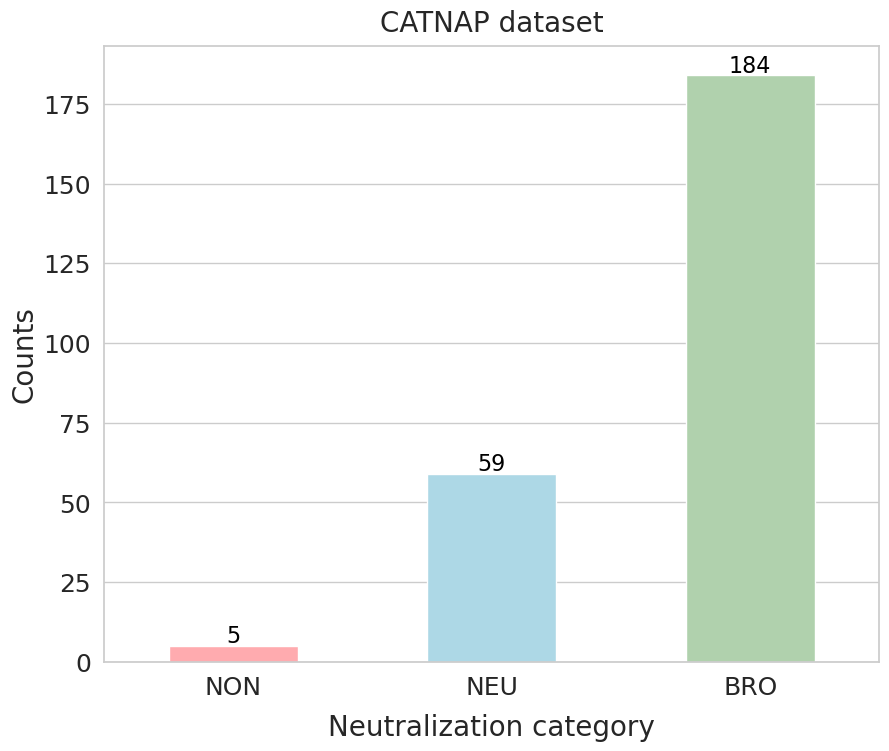

In [76]:
custom_order = ['NON', 'NEU', 'BRO']
# Count the frequency of each label
label_counts = complete_abs_info['label'].value_counts()
# Reindex the label_counts series with the custom order
label_counts = label_counts.reindex(custom_order)

# Set up the plot
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")

# Create the bar plot
ax = sns.barplot(x=label_counts.index, y=label_counts.values,width=0.5,dodge=True,order=custom_order)

# Adding value labels on top of bars
for i, v in enumerate(label_counts.values):
    ax.text(i, v + 1, str(v), color='black', ha='center',fontsize=16)
    

# Define a custom color palette
custom_palette  =["#ffabaf", "lightblue", "#b0d1ad"] 

# Set the colors for the bars
for i, bar in enumerate(ax.patches):
    bar.set_facecolor(custom_palette[i % len(custom_palette)])

# Rotating x-axis labels for better readability
plt.xticks(rotation=0,fontsize=18)
plt.yticks(rotation=0,fontsize=18)

plt.xlabel('Neutralization category', fontsize=20,labelpad=10)
plt.ylabel('Counts', fontsize=20,)
plt.title('CATNAP dataset', fontsize=20, y=1.01)
plt.tight_layout

plt.savefig("./img/complete_abs_info_bar_IMGT.svg", format="svg")
plt.savefig("./img/complete_abs_info_bar_IMGT.png", format="png")
plt.show()



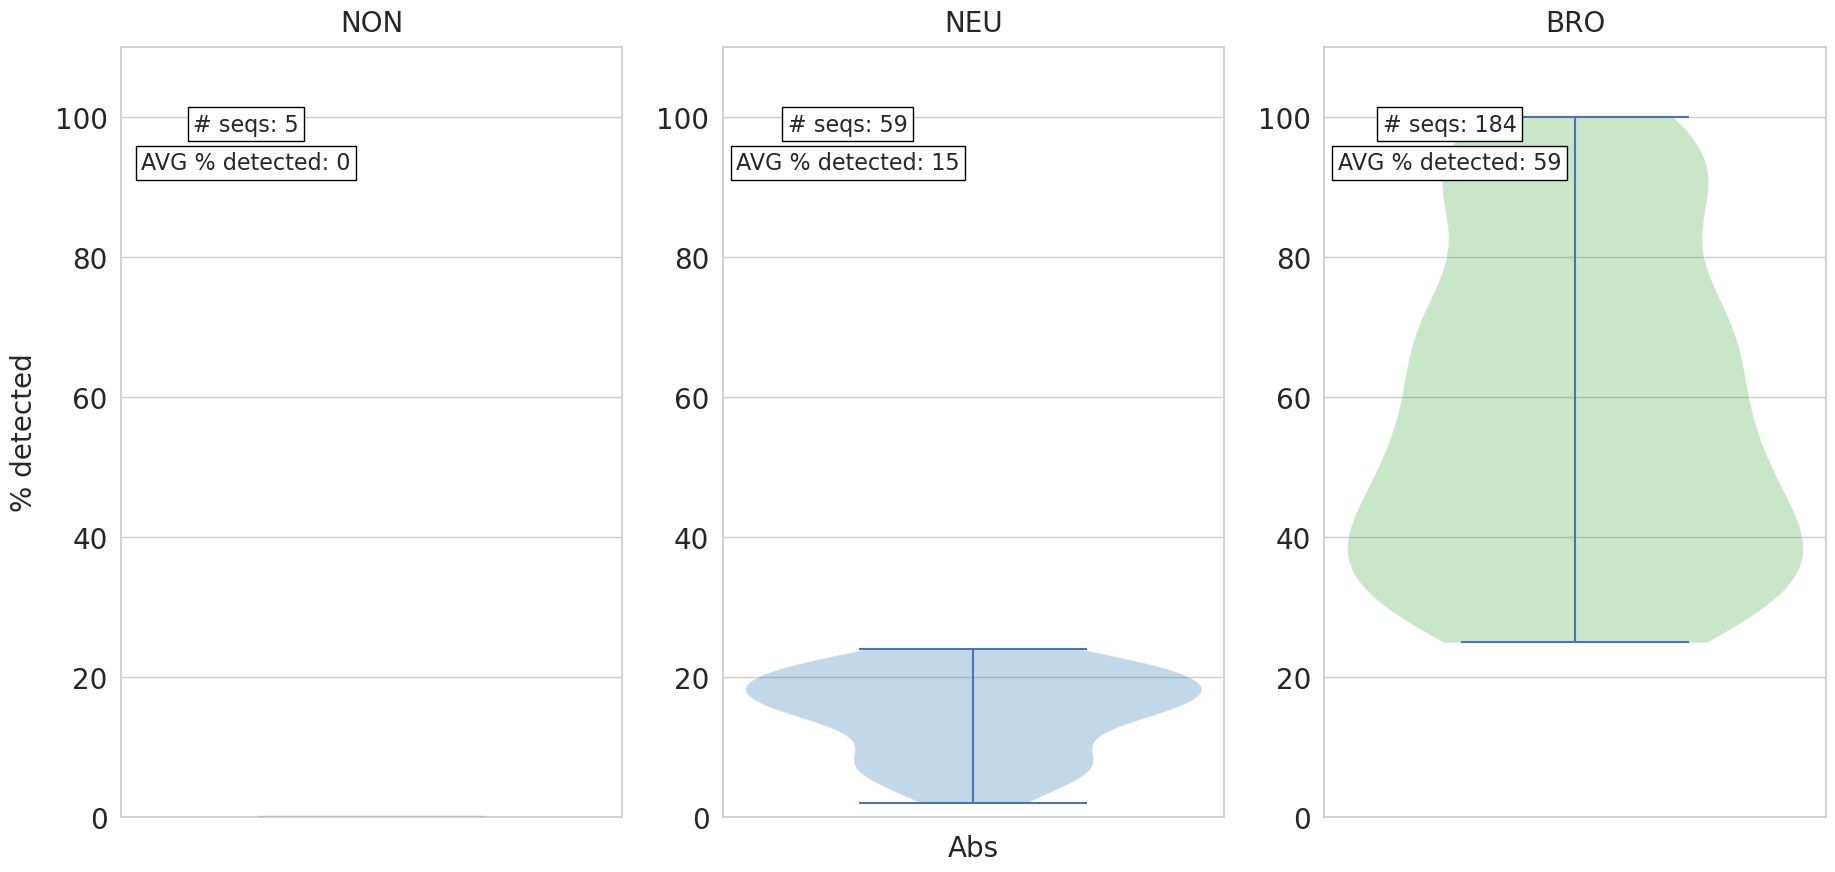

In [78]:
import statistics
# Group the DataFrame by 'category_neut'
df_outcome = complete_abs_info.groupby('label')
dfs_per_labels = {}

for label, group in df_outcome:
    dfs_per_labels[label] = group.copy()

# Create a new dictionary following the custom order
dfs_per_labels = {key: dfs_per_labels[key] for key in custom_order}

# Define a custom color palette
custom_palette = sns.color_palette("Set1", n_colors=len(custom_order))

# Calculate the maximum and minimum values of detection
max_cdr3_aa_len = 110 #max(cdr3_aa_len_values) - 2
min_cdr3_aa_len = 0 #min(cdr3_aa_len_values) + 1
    
fig, axes = plt.subplots(1, 3, figsize=(22, 10))
plt.subplots_adjust(hspace=0.5)

# Collect all cdr3_aa_len values in a list
cdr3_aa_len_values = []

for i, label in enumerate(dfs_per_labels.keys()):
    sub_df = dfs_per_labels[label]
    cdr3_aa_len = sub_df['%detected'].apply(lambda x: len(str(x)))
    cdr3_aa_len_values.extend(cdr3_aa_len)

# Calculate the maximum and minimum values of cdr3_aa_len
#max_cdr3_aa_len = 50 #max(cdr3_aa_len_values) - 2
#min_cdr3_aa_len = 5 #min(cdr3_aa_len_values) + 1

for i, label in enumerate(dfs_per_labels.keys()):
    col = i % 3
    sub_df = dfs_per_labels[label]
    ax = axes[col]
    ax.set_title(label, fontsize=20, y=1.01)
    cdr3_aa_len = sub_df['%detected']
    
    # Set the color using the custom palette
    violin_parts=ax.violinplot(cdr3_aa_len, widths=0.7,positions=[0])
    for pc in violin_parts['bodies']:
        pc.set_facecolor(custom_palette[i])
    ax.set_xticks([])
    

    text = f'# seqs: {str(len(sub_df))}'
    ax.text(0.25, 0.90, text, transform=ax.transAxes, ha='center', va='center', fontsize=16,
            bbox=dict(facecolor='white', edgecolor='black'))
    
    text = 'AVG % detected: {number:.0f}'.format(number=(statistics.mean(cdr3_aa_len)))
    ax.text(0.25, 0.85, text, transform=ax.transAxes, ha='center', va='center', fontsize=16,
            bbox=dict(facecolor='white', edgecolor='black'))
    
    # Set the Y-axis limits for each subplot based on the overall maximum and minimum
    #ax.set_ylim(min_cdr3_aa_len, max_cdr3_aa_len)
    ax.set_ylim(min_cdr3_aa_len, max_cdr3_aa_len)
    ax.tick_params(axis='y', labelsize=20) 

# Set common x-label and y-label on the middle subplot
common_x_label = 'Abs'
common_y_label = '% detected'

axes[1].set_xlabel(common_x_label, fontsize=20, labelpad=12)
axes[0].set_ylabel(common_y_label, fontsize=20, labelpad=12)

plt.savefig("./img/complete_abs_info_%detected_IMGT.svg", format="svg")
plt.savefig("./img/complete_abs_info_%detected_IMGT.png", format="png")

plt.show()


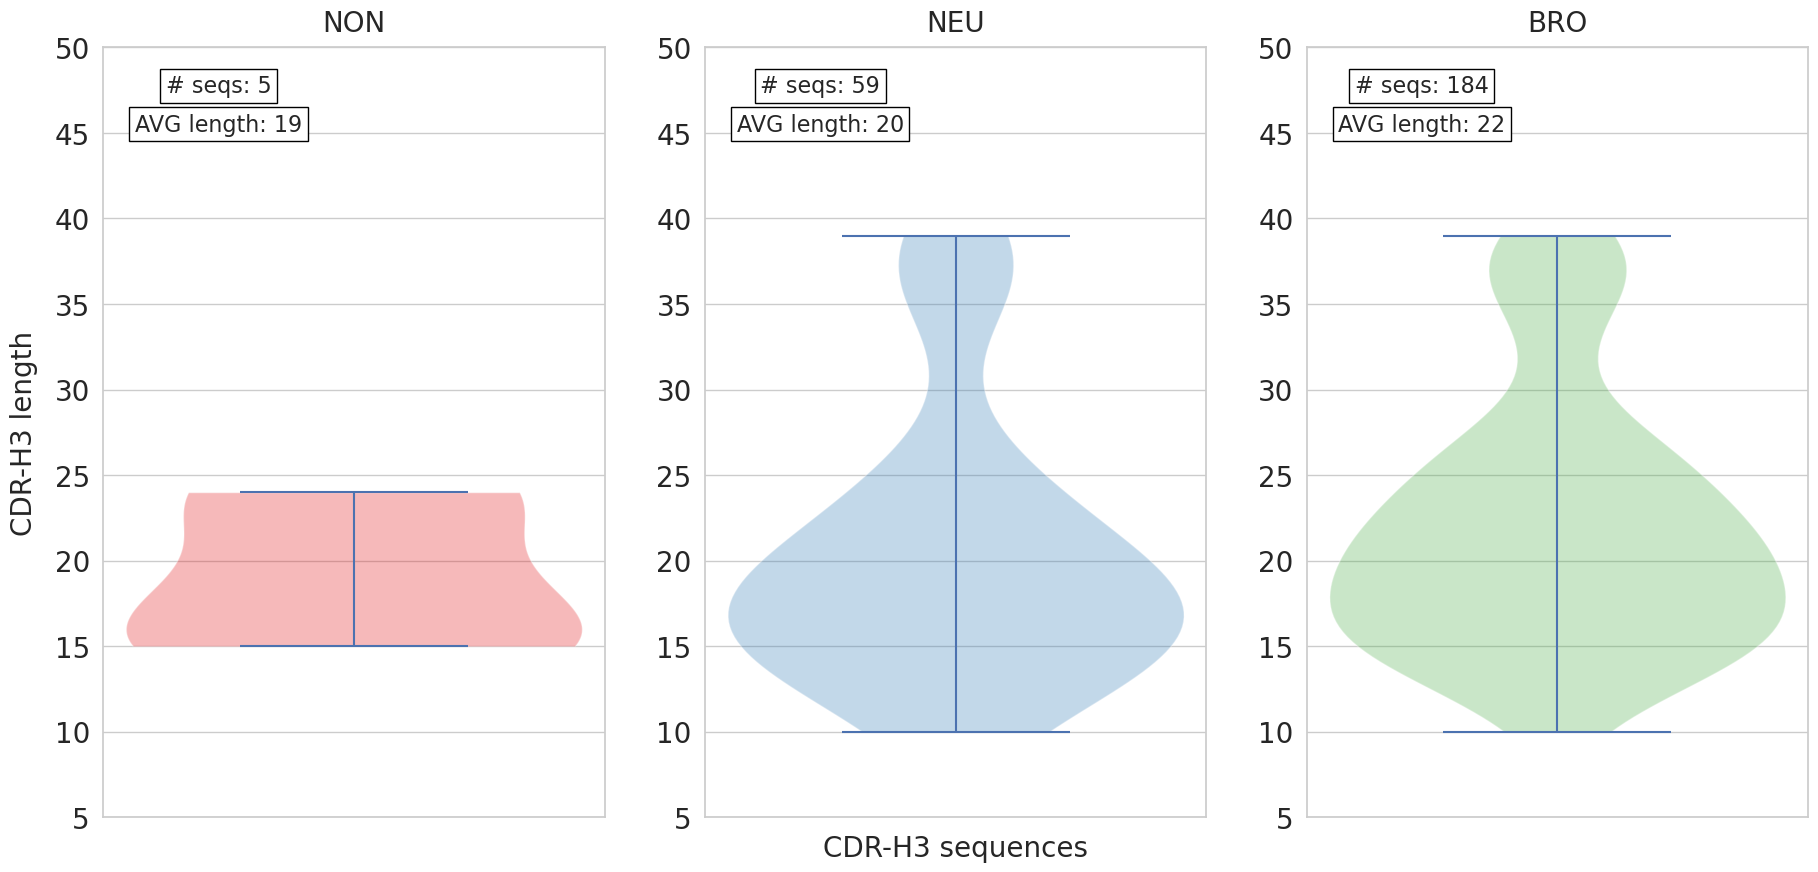

In [41]:
import statistics
df_outcome = complete_abs_info.groupby('label')
dfs_per_labels = {}

for label, group in df_outcome:
    dfs_per_labels[label] = group.copy()

# Create a new dictionary following the custom order
dfs_per_labels = {key: dfs_per_labels[key] for key in custom_order}

# Define a custom color palette
custom_palette = sns.color_palette("Set1", n_colors=len(custom_order))


fig, axes = plt.subplots(1, 3, figsize=(22, 10))
plt.subplots_adjust(hspace=0.5)

# Collect all cdr3_aa_len values in a list
cdr3_aa_len_values = []

for i, label in enumerate(dfs_per_labels.keys()):
    sub_df = dfs_per_labels[label]
    cdr3_aa_len = sub_df['junction_aa_IMGT'].apply(lambda x: len(str(x)))
    cdr3_aa_len_values.extend(cdr3_aa_len)

# Calculate the maximum and minimum values of cdr3_aa_len
max_cdr3_aa_len = 50 #max(cdr3_aa_len_values) - 2
min_cdr3_aa_len = 5 #min(cdr3_aa_len_values) + 1


for i, label in enumerate(dfs_per_labels.keys()):
    col = i % 3
    sub_df = dfs_per_labels[label]
    ax = axes[col]
    ax.set_title(label, fontsize=20, y=1.01)
    cdr3_aa_len = sub_df['junction_aa_IMGT'].apply(lambda x: len(str(x)))
    
    # Set the color using the custom palette
    violin_parts=ax.violinplot(cdr3_aa_len, widths=0.7,positions=[0])
    for pc in violin_parts['bodies']:
        pc.set_facecolor(custom_palette[i])
    ax.set_xticks([])
    

    text = f'# seqs: {str(len(sub_df))}'
    ax.text(0.23, 0.95, text, transform=ax.transAxes, ha='center', va='center', fontsize=16,
            bbox=dict(facecolor='white', edgecolor='black'))
    
    text = 'AVG length: {number:.0f}'.format(number=(statistics.mean(cdr3_aa_len)))
    ax.text(0.23, 0.90, text, transform=ax.transAxes, ha='center', va='center', fontsize=16,
            bbox=dict(facecolor='white', edgecolor='black'))
    
    # Set the Y-axis limits for each subplot based on the overall maximum and minimum
    ax.set_ylim(min_cdr3_aa_len, max_cdr3_aa_len)
    ax.tick_params(axis='y', labelsize=20) 

# Set common x-label and y-label on the middle subplot
common_x_label = 'CDR-H3 sequences'
common_y_label = 'CDR-H3 length'

axes[1].set_xlabel(common_x_label, fontsize=20, labelpad=12)
axes[0].set_ylabel(common_y_label, fontsize=20, labelpad=12)


plt.savefig("./img/complete_abs_info_crdh3length_IMGT.svg", format="svg")
plt.savefig("./img/complete_abs_info_crdh3length_IMGT.png", format="png")

plt.show()


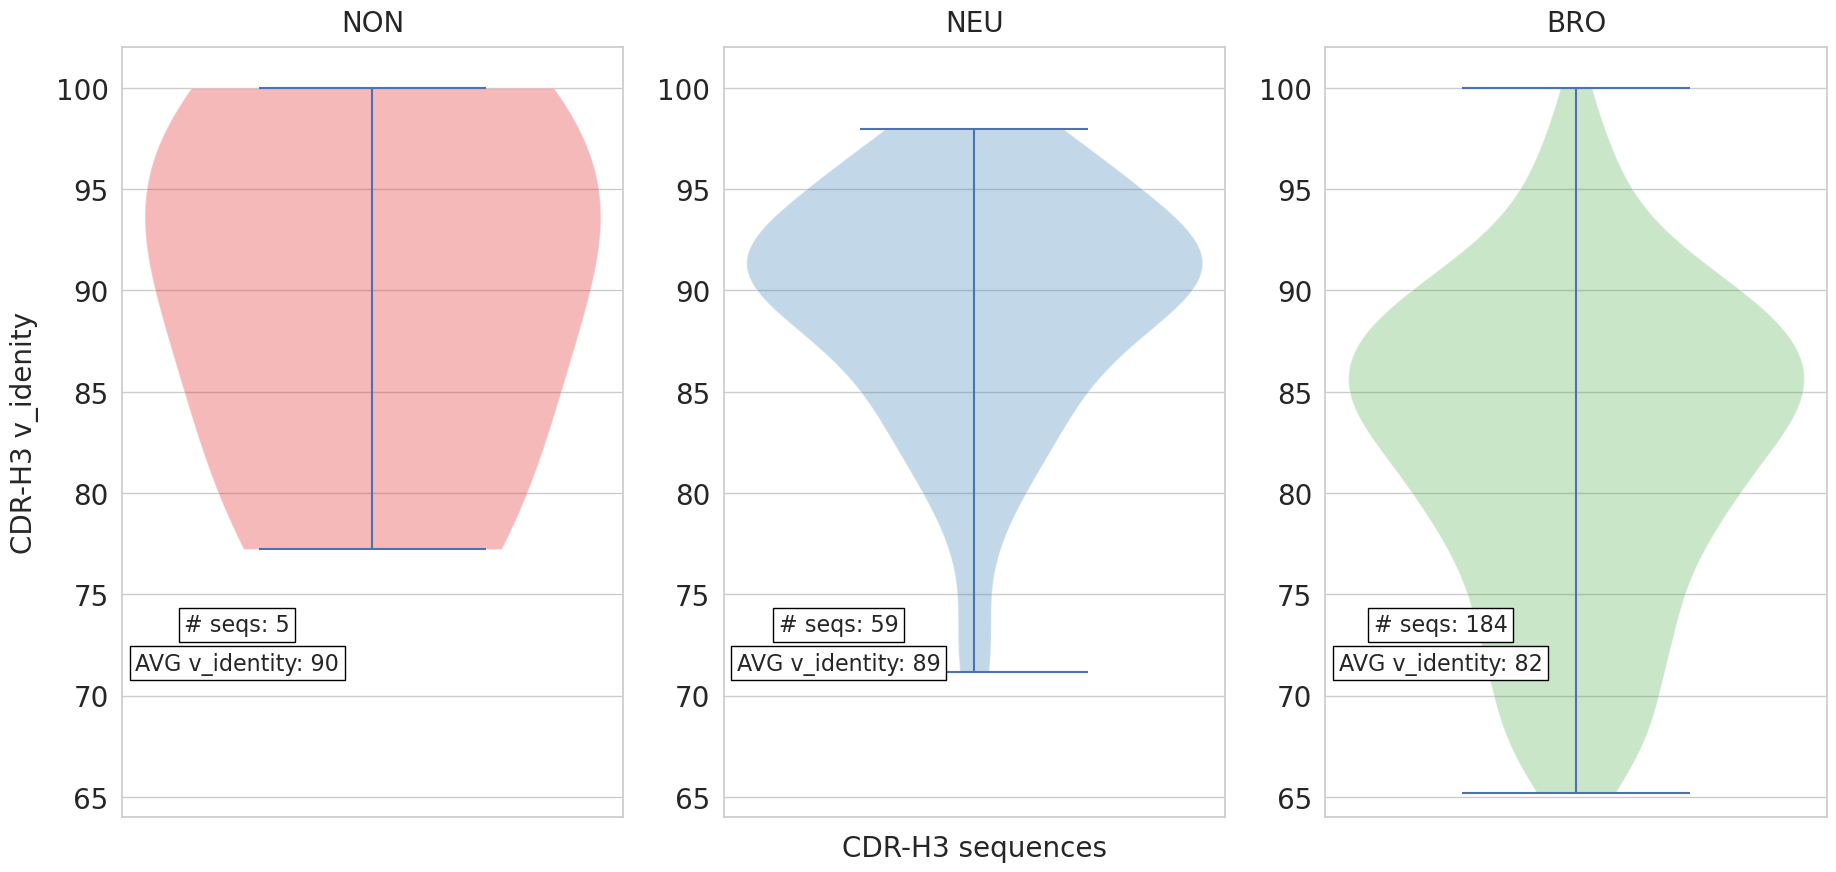

In [45]:
import statistics
df_outcome = complete_abs_info.groupby('label')
dfs_per_labels = {}

for label, group in df_outcome:
    dfs_per_labels[label] = group.copy()

# Create a new dictionary following the custom order
dfs_per_labels = {key: dfs_per_labels[key] for key in custom_order}

# Define a custom color palette
custom_palette = sns.color_palette("Set1", n_colors=len(custom_order))


fig, axes = plt.subplots(1, 3, figsize=(22, 10))
plt.subplots_adjust(hspace=0.5)


max_v_identity = 102 
min_v_identity = 64

for i, label in enumerate(dfs_per_labels.keys()):
    col = i % 3
    sub_df = dfs_per_labels[label]
    ax = axes[col]
    ax.set_title(label, fontsize=20, y=1.01)
    v_identity = sub_df['v_identity']
    
    # Set the color using the custom palette
    violin_parts=ax.violinplot(v_identity, widths=0.7,positions=[0])
    for pc in violin_parts['bodies']:
        pc.set_facecolor(custom_palette[i])
    ax.set_xticks([])
    

    text = f'# seqs: {str(len(sub_df))}'
    ax.text(0.23, 0.25, text, transform=ax.transAxes, ha='center', va='center', fontsize=16,
            bbox=dict(facecolor='white', edgecolor='black'))
    
    text = 'AVG v_identity: {number:.0f}'.format(number=(statistics.mean(v_identity)))
    ax.text(0.23, 0.20, text, transform=ax.transAxes, ha='center', va='center', fontsize=16,
            bbox=dict(facecolor='white', edgecolor='black'))
    
    # Set the Y-axis limits for each subplot based on the overall maximum and minimum
    ax.set_ylim(min_v_identity, max_v_identity)
    ax.tick_params(axis='y', labelsize=20) 

# Set common x-label and y-label on the middle subplot
common_x_label = 'CDR-H3 sequences'
common_y_label = 'CDR-H3 v_idenity'

axes[1].set_xlabel(common_x_label, fontsize=20, labelpad=12)
axes[0].set_ylabel(common_y_label, fontsize=20, labelpad=12)


plt.savefig("./img/complete_abs_info_crdh3_v_identity_IMGT.svg", format="svg")
plt.savefig("./img/complete_abs_info_crdh3_v_identity_IMGT.png", format="png")

plt.show()
